In [37]:
from tensorflow.keras import models, layers, utils
import matplotlib.pyplot as plt


In [38]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.3, random_state=2023)

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [39]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.

mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.

std = train_data.std(axis=0)
train_data = train_data/std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.

test_data = test_data - mean
test_data = test_data/std


In [98]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics='mae')

In [99]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('Boston_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=15, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=50, 
                    validation_data=(x_val, y_val),
                   callbacks=[check_point_cb,early_stopping_cb])


Epoch 1/100
6/6 [==============================] - 0s 26ms/step - loss: 401.7823 - mae: 16.3621 - val_loss: 130.8108 - val_mae: 9.1403
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 182.4765 - mae: 10.4996 - val_loss: 116.5381 - val_mae: 9.2072
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 91.0770 - mae: 7.6417 - val_loss: 99.5382 - val_mae: 7.9239
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 101.6404 - mae: 7.8694 - val_loss: 85.8977 - val_mae: 7.3814
Epoch 5/100
1/6 [====>.........................] - ETA: 0s - loss: 80.5207 - mae: 7.1679

C:\Users\sunw0506\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 9ms/step - loss: 74.1864 - mae: 6.7250 - val_loss: 81.2995 - val_mae: 7.5711
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 64.4323 - mae: 6.3195 - val_loss: 71.0622 - val_mae: 6.5280
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 58.9228 - mae: 5.4296 - val_loss: 76.9230 - val_mae: 6.0862
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 60.0151 - mae: 5.3258 - val_loss: 73.4476 - val_mae: 6.3810
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 57.5892 - mae: 5.5630 - val_loss: 72.7326 - val_mae: 6.6347
Epoch 10/100
6/6 [==============================] - 0s 9ms/step - loss: 56.7214 - mae: 5.5146 - val_loss: 70.0734 - val_mae: 6.2404
Epoch 11/100
6/6 [==============================] - 0s 9ms/step - loss: 56.0919 - mae: 5.3178 - val_loss: 68.8218 - val_mae: 6.2602
Epoch 12/100
6/6 [==============================] - 0s 6ms/step - loss: 55.1907 - mae: 5.395

6/6 [==============================] - 0s 10ms/step - loss: 36.7334 - mae: 4.1684 - val_loss: 43.9422 - val_mae: 5.0079
Epoch 68/100
6/6 [==============================] - 0s 9ms/step - loss: 34.1774 - mae: 4.0323 - val_loss: 43.5827 - val_mae: 4.6904
Epoch 69/100
6/6 [==============================] - 0s 6ms/step - loss: 33.3422 - mae: 4.1099 - val_loss: 44.3050 - val_mae: 4.6266
Epoch 70/100
6/6 [==============================] - 0s 10ms/step - loss: 32.8249 - mae: 3.8727 - val_loss: 42.4420 - val_mae: 4.7777
Epoch 71/100
6/6 [==============================] - 0s 6ms/step - loss: 32.5955 - mae: 4.0193 - val_loss: 42.5907 - val_mae: 4.6478
Epoch 72/100
6/6 [==============================] - 0s 9ms/step - loss: 32.3197 - mae: 3.8814 - val_loss: 42.2854 - val_mae: 4.8145
Epoch 73/100
6/6 [==============================] - 0s 6ms/step - loss: 32.7589 - mae: 4.0139 - val_loss: 42.6468 - val_mae: 4.6379
Epoch 74/100
6/6 [==============================] - 0s 6ms/step - loss: 32.1888 - mae: 

C:\Users\sunw0506\AppData\Local\Temp\ipykernel_14052\2300888499.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


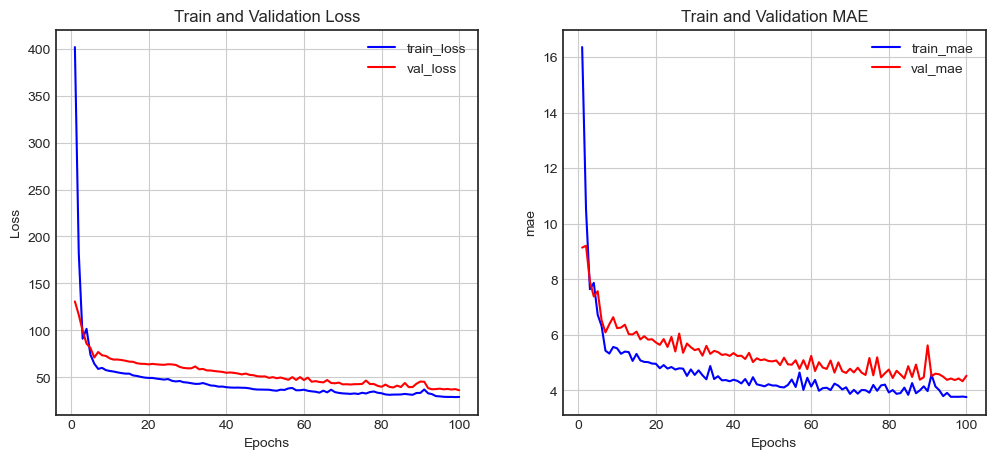

In [100]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()

plt.show()

In [101]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 589.2034 - mae: 22.5982


[589.203369140625, 22.598188400268555]